# Jan Guttman PD 6

# Wczytanie pakietów i ramki danych

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C://Users/48881/Documents/studia/sem_04/wstęp_do_eksploracji_danych/World-happiness-report-2024.csv")

# Podgląd na ramkę danych 

In [85]:
df.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [86]:
df.shape

(143, 12)

In [87]:
df.dtypes

Country name                     object
Regional indicator               object
Ladder score                    float64
upperwhisker                    float64
lowerwhisker                    float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object

Jak widać ramka danych ma 143 wiersze i 12 kolumn, a dane są typów object i float

# Podsumowanie ramki
Stosując funkcję describe dostaję ramkę z wyliczonymi statystykami dla poszczególnych kolumn ramki danych

In [88]:
df.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


# Grupowanie
Pierwsza tabelka wraz z wykresem przedstawia średnią oczekiwanej długości życia dla poszczególnych stref geograficznych.

In [89]:
df1 = df.groupby("Regional indicator")["Healthy life expectancy"].mean().reset_index(name='mean').sort_values(["mean"]).reset_index(drop=True)
df1

,Regional indicator,mean
0,Sub-Saharan Africa,0.297686
1,South Asia,0.420333
2,Southeast Asia,0.520222
3,Commonwealth of Independent States,0.543556
4,Middle East and North Africa,0.553200
5,Latin America and Caribbean,0.571158
6,Central and Eastern Europe,0.610412
7,North America and ANZ,0.652000
8,East Asia,0.681833
9,Western Europe,0.709150


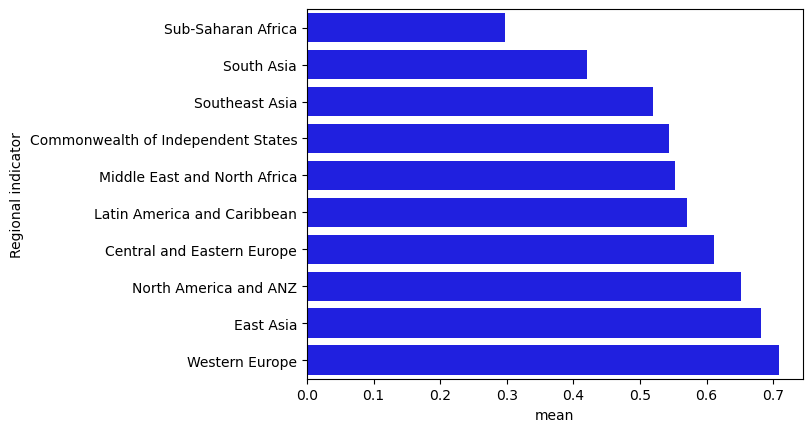

In [90]:
g=sns.barplot(data=df1, y="Regional indicator", x="mean", color="blue")

# Rozkłady
Rozkład wskaźnika oddawania pieniędzy na cele charytatywne

<AxesSubplot:ylabel='Generosity'>

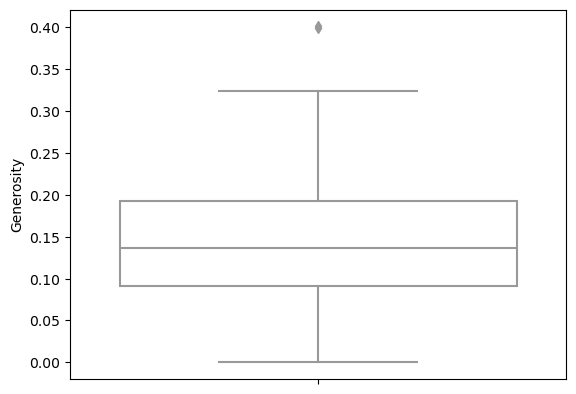

In [91]:
sns.boxplot(data=df, y="Generosity", color="white")

In [92]:
df1=df.sort_values(["Generosity"], ascending=False).reset_index(drop=True)
df1[["Country name", "Generosity"]].head(3)

,Country name,Generosity
0,Myanmar,0.401
1,Indonesia,0.399
2,Gambia,0.324


Jak widać Mjanma jest krajem, w którym największy procent ludzie oddaje pieniądze na cele charytatywne

Rozkład zadowolenia z wolności wyboru w danych krajach

<AxesSubplot:ylabel='Freedom to make life choices'>

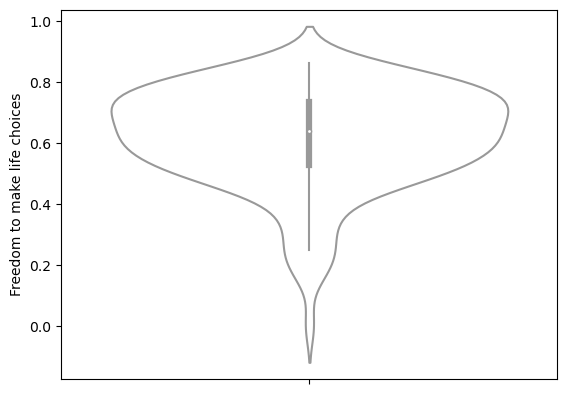

In [93]:
sns.violinplot(data=df, y="Freedom to make life choices", color="white")

# Zależności
Zależność średniej dolnej granicy oceny szczęścia od regionu geograficznego

In [94]:
df1 = df.groupby("Regional indicator")["upperwhisker"].mean().reset_index(name='mean').sort_values(["mean"]).reset_index(drop=True)
df1

,Regional indicator,mean
0,South Asia,3.996500
1,Sub-Saharan Africa,4.476200
2,Middle East and North Africa,5.312294
3,Commonwealth of Independent States,5.637500
4,Southeast Asia,5.662111
5,East Asia,6.022667
6,Central and Eastern Europe,6.267529
7,Latin America and Caribbean,6.268263
8,Western Europe,6.928500
9,North America and ANZ,7.012000


<AxesSubplot:xlabel='mean', ylabel='Regional indicator'>

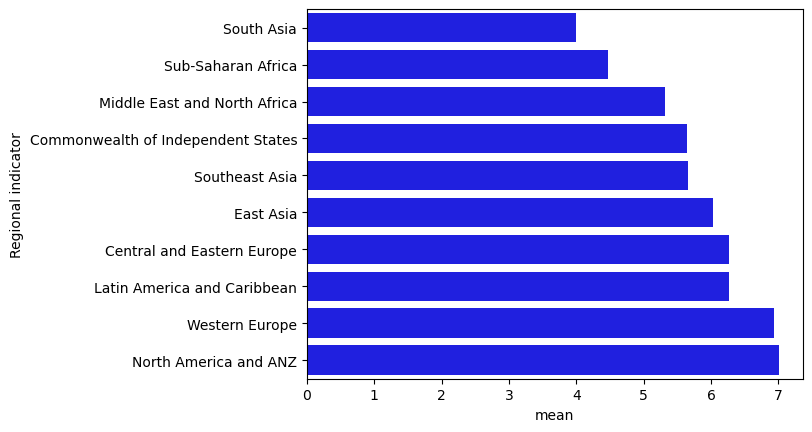

In [95]:
sns.barplot(data=df1, y="Regional indicator", x="mean", color="blue")

Zależność średniej górnej granicy oceny szczęścia od regionu geograficznego

In [96]:
df1 = df.groupby("Regional indicator")["lowerwhisker"].mean().reset_index(name='mean').sort_values(["mean"]).reset_index(drop=True)
df1

,Regional indicator,mean
0,South Asia,3.795000
1,Sub-Saharan Africa,4.183314
2,Middle East and North Africa,5.087529
3,Commonwealth of Independent States,5.439400
4,Southeast Asia,5.441556
5,East Asia,5.846333
6,Latin America and Caribbean,6.018474
7,Central and Eastern Europe,6.074235
8,Western Europe,6.754600
9,North America and ANZ,6.843250


<AxesSubplot:xlabel='mean', ylabel='Regional indicator'>

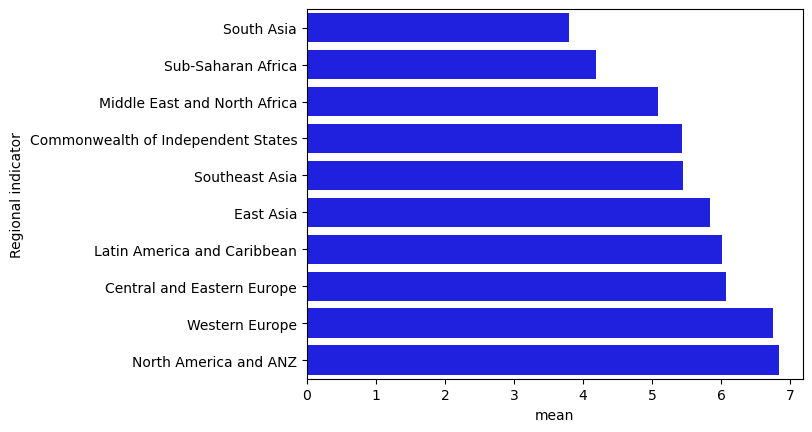

In [97]:
sns.barplot(data=df1, y="Regional indicator", x="mean", color="blue")

Jak widać zarówno górna jak i dolna granica najlepiej prezentuje się w Północnej Ameryce oraz Australii i Nowej Zelandii.